# <center>Observation space time evolution</center>

Example notebook for plotting observation space time evolution from DART filter diagnostics output.

Output is generated with obs_diag script:
https://docs.dart.ucar.edu/en/latest/assimilation_code/programs/obs_diag/threed_cartesian/obs_diag.html

See obs_space_diagnostics_contents.ipynb for example of how to find options for variable, statistics and pressure level options.

In [2]:
from dartplot import obs

## Plot time evolution of a spatially averaged statistic

In [3]:
obs.plot_evolution?

Signature:
obs.plot_evolution(
    fname,
    vname,
    stat,
    level=None,
    plevel=None,
    fig=None,
    region=0,
    style='-',
    legend=False,
    color='turbo_r',
)
Docstring:
Used to plot observation space time evolution from DART filter diagnostics output

Inputs:
fname (str) --> name of obs_diag_output.nc file
vname (str) --> name of variable to be read
stat (str, optional) --> what statistic or "copy" to be read for chosen variable
level (int or list of ints) pressure level to select by index(s)
plevel (int, str or list of ints/strs) pressure level to select by value(s)
region(int) --> index of region to select. defaults to 0 as we just have 1 region. If no region use None.
style(str) --> line style e.g. '-'
legend (boolean)--> if True plots a legend
color --> can specify line color as described in obs.get_rgba_color

Outputs:
fig, ax1 --> plot figure and axis
File:      /glade/work/rclancy/ARCTIC_DA/analysis/dartplot/src/dartplot/obs.py
Type:      function

In [3]:
obs.get_rgba_color?

Signature: obs.get_rgba_color(color, n=False)
Docstring:
Gets list of colors to use for plotting from various potential inputs

e.g.:
get_rgba_color('r')
get_rgba_color(['r', 'xkcd:blue', 'green'])
get_rgba_color('magma', 5)
get_rgba_color(ax1, [1,3])

Inupts:
color (string "red", short string "r",
       list of strings/short strings ['r', 'xkcd:blue', 'green'],
       matplotlib cmap name as string'turbo',
       axis ax1 with colored lines already plotted that need matching,
       np.ndarray rgba array([1.4620e-03, 4.6600e-04, 1.3866e-02, 1.0000e+00])
      )
n (integer, optional) --> for use with colormap, determines number of colors to select from colormap
n (integer, list, optional) --> for use with np.array or axis to select which index/indices of existing color list to use 

Returns:
rgba_color (numpy.ndarray) --> n x 4 (r, g, b, a) array describing colors list for use in plots
File:      /glade/work/rclancy/ARCTIC_DA/analysis/diag_package/obs.py
Type:      function

### Plot time evolution of satellite wind U component RMSE at 850 hPa

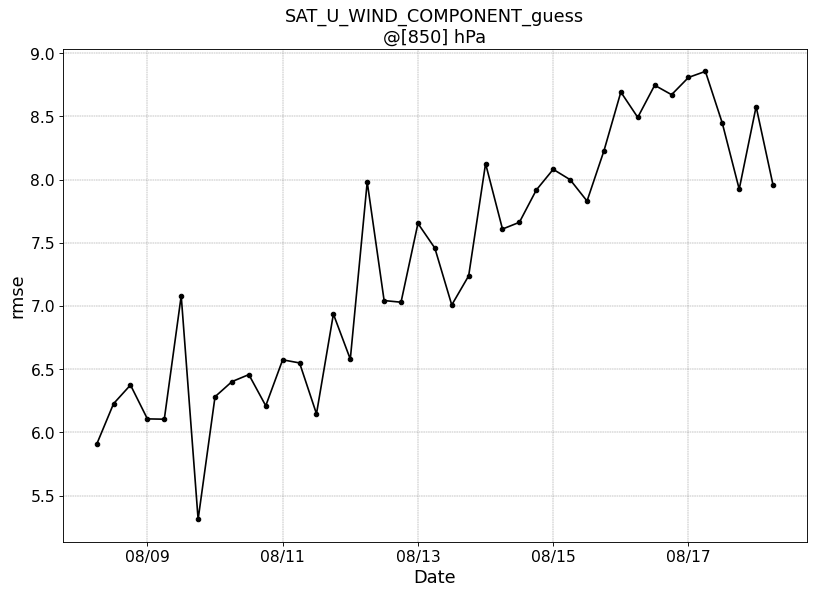

In [8]:
fname = 'obs_diag_output_example.nc'
vname = 'SAT_U_WIND_COMPONENT_guess'
stat = 'rmse'
plevel = [850]
fig, ax1 = obs.plot_evolution(fname, vname, stat, plevel=plevel, color='k')

### Plot rmse evolution at various levels using specified colors

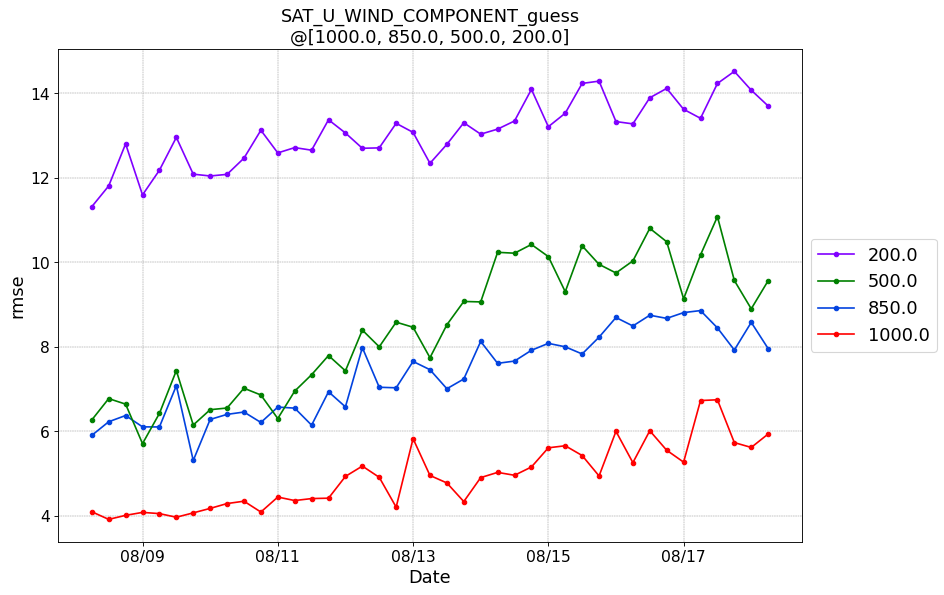

In [5]:
fname = 'obs_diag_output_example.nc'
vname = 'SAT_U_WIND_COMPONENT_guess'
stat = 'rmse'
level = [0, 2, 4, 8]
fig, ax1 = obs.plot_evolution(fname, vname, stat, level=level, color=['r', 'xkcd:blue', 'green', [0.5, 0, 1]], legend=True)

### Plotting evolution at a range of levels based on a matplotlib colormap and evoluation at another level on top
(need to correct the title manually for this use case)

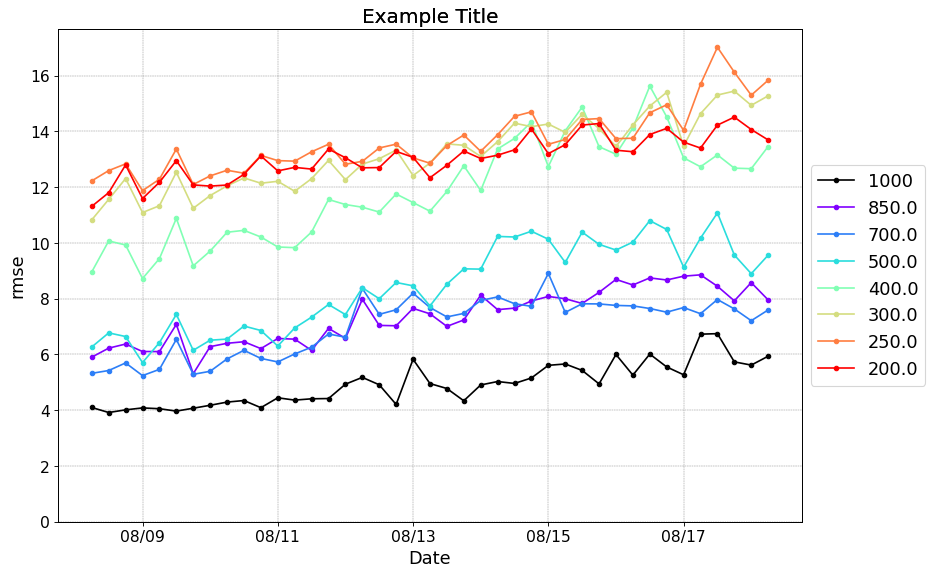

In [6]:
fname = 'obs_diag_output_example.nc'
vname = 'SAT_U_WIND_COMPONENT_guess'
stat = 'rmse'
level = [2, 3, 4, 5, 6, 7, 8]
fig, ax1 = obs.plot_evolution(fname, vname, stat, level=level, color="rainbow", legend=True)
plevel = [1000]
fig, ax1 = obs.plot_evolution(fname, vname, stat, plevel=plevel, fig=fig, legend=True, color='black')
[f.set_title('Example Title', size=18) for f in fig.axes];

### Plotting evolution of multiple variables
(could do with tidying into a function)

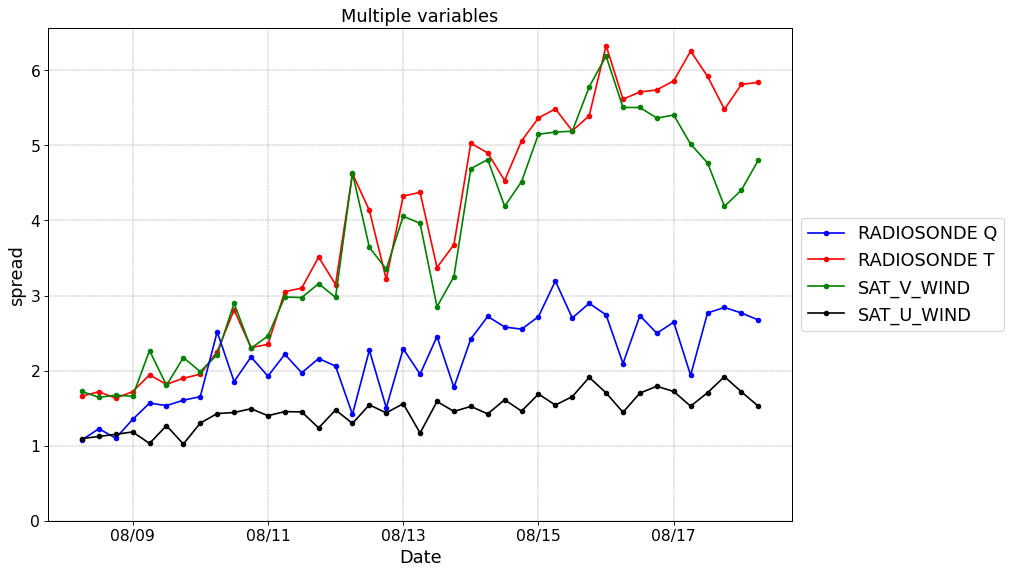

In [9]:
fname = 'obs_diag_output_example.nc'
stat = 'spread'
plevel = [850]
fig, ax1 = obs.plot_evolution(fname, 'SAT_U_WIND_COMPONENT_guess', stat, plevel=plevel, legend=True, color='red')
fig, ax2 = obs.plot_evolution(fname, 'SAT_V_WIND_COMPONENT_guess', stat, plevel=plevel, fig=fig, legend=True, color='green')
fig, ax3 = obs.plot_evolution(fname, 'RADIOSONDE_TEMPERATURE_guess', stat, plevel=plevel, fig=fig, legend=True, color='blue')
fig, ax4 = obs.plot_evolution(fname, 'RADIOSONDE_SPECIFIC_HUMIDITY_guess', stat, plevel=plevel, fig=fig, legend=True, color='k')

[x.set_title('') for x in fig.get_axes()];
ax1.set_title('Multiple variables', fontsize=16);
legend_obj = ax1.get_legend()
ax1.legend(handles=legend_obj.legend_handles, labels=['SAT_U_WIND', 'SAT_V_WIND', 'RADIOSONDE T', 'RADIOSONDE Q'],
           fontsize=16, reverse=True, bbox_to_anchor=(1, 0.5), loc='center left');

# Evolution of number of observations / number assimilated
Total = o\
Assimilated = *

In [2]:
obs.plot_n?

Signature:
obs.plot_n(
    fname,
    vname,
    level=None,
    plevel=None,
    region=0,
    fig=None,
    legend=False,
    color='turbo_r',
    n=False,
)
Docstring:
Used to plot time evolution of number of observations available and used from DART filter diagnostics output

Inputs:
fname (str) --> name of obs_diag_output.nc file
vname (str) --> name of variable to be read
level (int or list of ints) pressure level to select by index(s)
plevel (int, str or list of ints/strs) pressure level to select by value(s)
region(int) --> index of region to select. defaults to 0 as we just have 1 region. If no region use None.
fig --> figure handle to plot second axis on top of of e.g. one from plot_evolution
legend (boolean)--> if True plots a legend
color --> can specify line color as described in obs.get_rgba_color
n (integer or list) --> can be combined with color as described in obs.get_rgba_color

Outputs:
fig, ax2 --> plot figure and axis
File:      /glade/work/rclancy/ARCTIC_DA/analys

### Plot time evolution number of observations and number assimilated at various levels

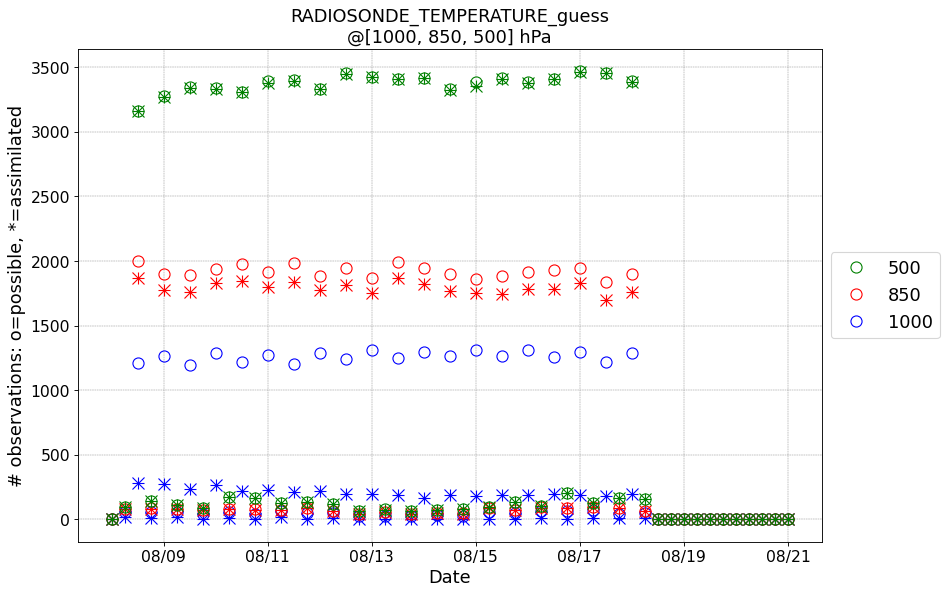

In [16]:
fname = 'obs_diag_output_example.nc'
vname = 'RADIOSONDE_TEMPERATURE_guess'
stat = 'totalspread'
plevel = [1000, 850, 500]
fig, ax2 = obs.plot_n(fname, vname, plevel=plevel, region=0, legend=True, color=['b', 'r', 'g'])

### Plot number of observations on top of a statistic

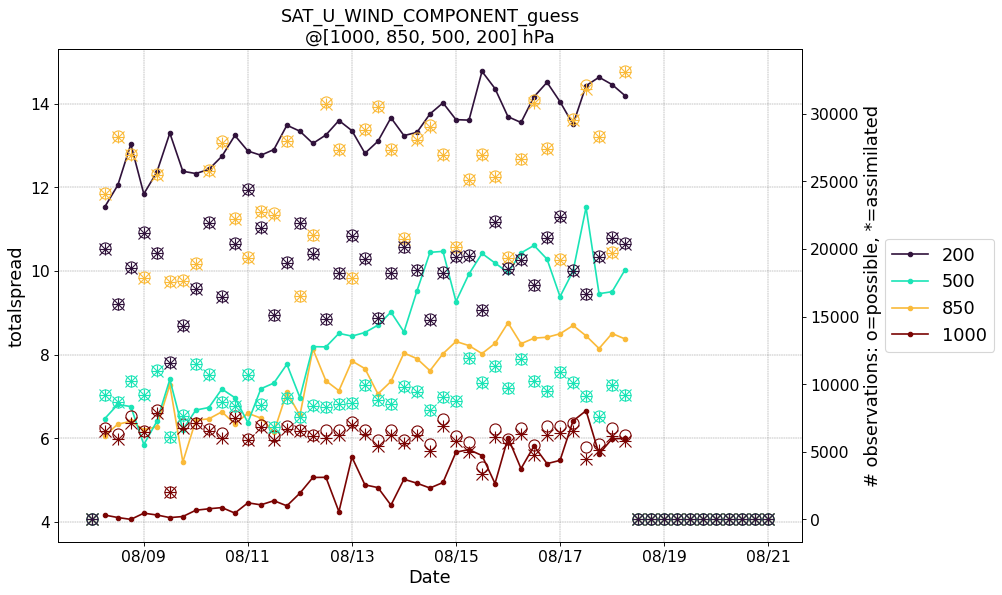

In [4]:
fname = 'obs_diag_output_example.nc'
vname = 'SAT_U_WIND_COMPONENT_guess'
stat = 'totalspread'
plevel = [1000, 850, 500, 200]
fig, ax1 = obs.plot_evolution(fname, vname, stat, plevel=plevel, legend=True)
fig, ax2 = obs.plot_n(fname, vname, plevel=plevel, region=0, fig=fig, legend=True, color=ax1)

### As before but only plotting numbers for specific levels while retaining color matching

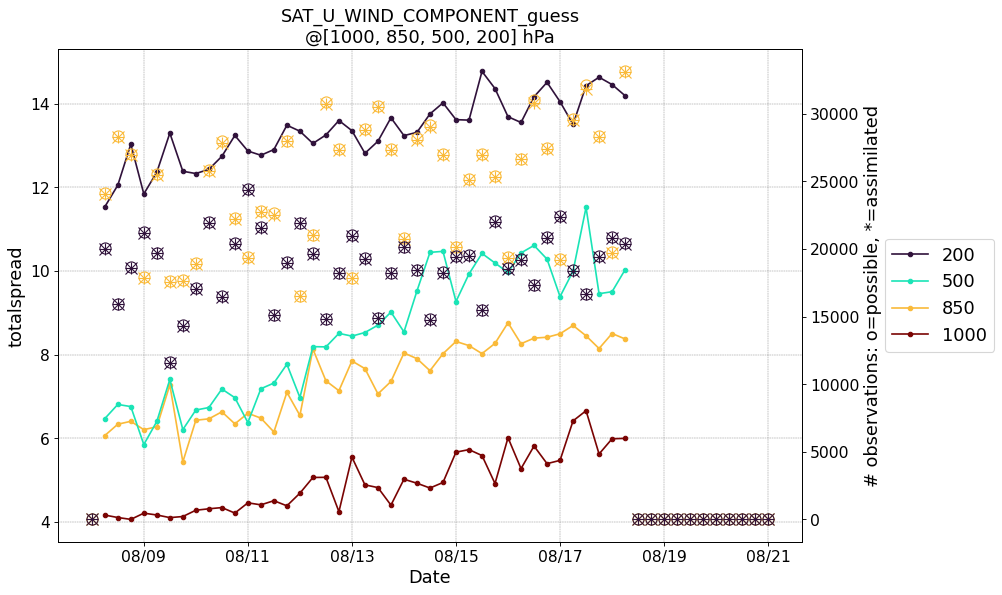

In [5]:
fname = 'obs_diag_output_example.nc'
vname = 'SAT_U_WIND_COMPONENT_guess'
stat = 'totalspread'
plevel = [1000, 850, 500, 200]
fig, ax1 = obs.plot_evolution(fname, vname, stat, plevel=plevel, legend=True)
fig, ax2 = obs.plot_n(fname, vname, plevel=[850, 200], region=0, fig=fig, legend=True, color=ax1, n=[1,3])

# Plotting RMSE and spread together

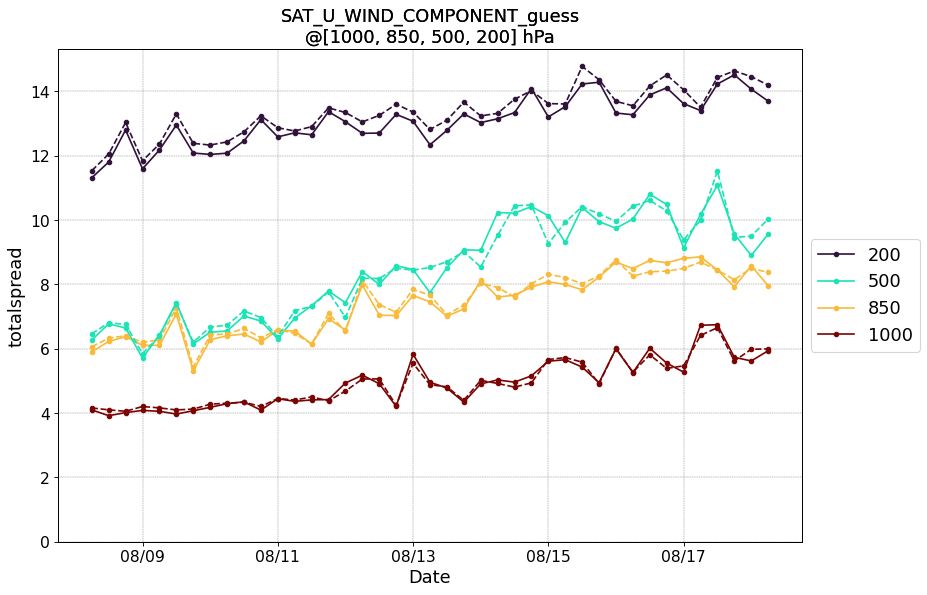

In [4]:
fname = 'obs_diag_output_example.nc'
vname = 'SAT_U_WIND_COMPONENT_guess'
stat = 'rmse'
plevel = [1000, 850, 500, 200]
fig, ax1 = obs.plot_evolution(fname, vname, stat, plevel=plevel, legend=True)
stat = 'totalspread'
fig, ax2 = obs.plot_evolution(fname, vname, stat, plevel=plevel, fig=fig, style = '--', legend=False)